In [1]:
from hyper import *
from alignment import *
from datasets.preprecossing import *
from core import *
from datasets.loading import *
from datasets.hc_dataset import *
from datasets.balance_dataset import *
from utils.linkage import *
from model.balancehc import balancehc

from utils.poincare import *
import scib
import shutil



In [2]:
cell_path1 = './datas/321/Tcell_raw_counts02_v2.h5ad'
folder_path1 = './datas/321/'
radius1 = 0
c1 =0
epoches1 =  50
epoches2 =  10
contin = False
resolution=2
method='average'
alignment=1
n_pca=50
meta_col = 'Celltype..major.lineage.'
ms = False


In [3]:
adata = sc.read_h5ad(cell_path1)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/Sample name' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/Sample name' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/Diagnosis' was written without encoding metadata.
  categories = read_elem(categories_dset)
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/Diagnosis' was written without encoding metadata.
  read_elem(dataset), categories, ordered=ordered
/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/anndata/_io/specs/meth

AnnData object with n_obs × n_vars = 38633 × 33538
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'S_score', 'G2M_score', 'phase', 'productive', 'annotation', 'Gender'
    var: 'gene_ids', 'feature_types'

In [4]:
t=list(adata.obs['annotation'].unique())
t

['gdT',
 'Treg',
 'Tfh',
 'Activated CD4 T',
 'CD8 Tmem',
 'SELL+ CD8 T',
 'SELL+ CD4 T',
 'Th17',
 'TRGV2 gdT',
 'NK cell',
 'Th1',
 'Activated CD8 T',
 'NK T cell',
 'ILC3',
 'TRGV4 gdT',
 'TRGV5/7 gdT',
 'ILC2',
 'CX3CR1+ CD8 Tmem',
 'MAIT cell',
 'LTi-like NCR- ILC3',
 'LTi-like NCR+ ILC3',
 'fetal T cell',
 'TRDV2/TRGV9 gdT',
 'ILCP']

In [5]:
t.remove('NK cell')
t.remove('NK T cell')
t.remove('LTi-like NCR- ILC3')
t.remove('LTi-like NCR+ ILC3')
t

['gdT',
 'Treg',
 'Tfh',
 'Activated CD4 T',
 'CD8 Tmem',
 'SELL+ CD8 T',
 'SELL+ CD4 T',
 'Th17',
 'TRGV2 gdT',
 'Th1',
 'Activated CD8 T',
 'ILC3',
 'TRGV4 gdT',
 'TRGV5/7 gdT',
 'ILC2',
 'CX3CR1+ CD8 Tmem',
 'MAIT cell',
 'fetal T cell',
 'TRDV2/TRGV9 gdT',
 'ILCP']

In [6]:
t = ['gdT','TRGV2 gdT','TRGV4 gdT','TRGV5/7 gdT','TRDV2/TRGV9 gdT']
t

['gdT', 'TRGV2 gdT', 'TRGV4 gdT', 'TRGV5/7 gdT', 'TRDV2/TRGV9 gdT']

In [7]:
adata = adata[adata.obs[adata.obs['annotation'].isin(t)].index]

In [8]:
adata.obs['annotation'].unique()

['gdT', 'TRGV2 gdT', 'TRGV4 gdT', 'TRGV5/7 gdT', 'TRDV2/TRGV9 gdT']
Categories (5, object): ['TRDV2/TRGV9 gdT', 'TRGV2 gdT', 'TRGV4 gdT', 'TRGV5/7 gdT', 'gdT']

In [9]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, exclude_highly_expressed=True)
sc.pp.log1p(adata)
adata

/Users/dongjiajie/opt/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


AnnData object with n_obs × n_vars = 4201 × 16562
    obs: 'Sample name', 'Diagnosis', 'Age', 'sample name', 'Region code', 'Fraction', 'Region', '10X', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'doublet_scores', 'predicted_doublets', 'S_score', 'G2M_score', 'phase', 'productive', 'annotation', 'Gender'
    var: 'gene_ids', 'feature_types', 'n_cells'
    uns: 'log1p'

In [10]:
sc.pp.highly_variable_genes(
    adata,
    min_mean=0.0125,
    max_mean=3,
    min_disp=0.5,
    n_top_genes=2000
)
adata.raw = adata
adata._inplace_subset_var(adata.var['highly_variable'])
adata.to_df()

,HES4,ISG15,TNFRSF18,FO704657.1,CALML6,CHD5,Z98884.1,TNFRSF9,AL096855.1,AL139424.3,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND5,MT-ND6,MT-CYB,AC145212.1,AL354822.1
AAACCTGAGGAGTTTA-1-4918STDY7333456,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.657428,3.083581,2.657428,0.000000,1.062717,0.000000,2.657428,0.0,0.0
AAACGGGAGGCGATAC-1-4918STDY7333456,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.976708,3.114586,3.251750,2.766401,0.000000,0.976708,0.000000,3.313866,0.0,0.0
AAATGCCAGTAGCCGA-1-4918STDY7333456,0.731941,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.962430,3.117164,3.369257,1.150010,2.011521,0.000000,3.163844,0.0,0.0
AACACGTTCCGGGTGT-1-4918STDY7333456,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.739031,2.270392,2.270392,0.894944,1.359539,0.000000,2.108514,0.0,0.0
AACTGGTAGTTAAGTG-1-4918STDY7333456,0.000000,0.889410,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,3.047931,2.901659,3.113755,1.352579,0.889410,0.000000,3.047931,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGAGCATAGGTGCACA-1-WTDAtest7770718,0.000000,0.668724,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.258184,2.948805,1.903668,0.000000,1.065913,0.668724,2.948805,0.0,0.0
TGAGCCGTCTTGCATT-1-WTDAtest7770718,0.000000,0.682030,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.177375,2.974504,2.059905,0.000000,1.083762,0.000000,2.869268,0.0,0.0
TGCACCTCAGACAAAT-1-WTDAtest7770718,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.685193,0.0,0.0,...,0.000000,2.288221,2.980564,2.288221,0.685193,0.000000,0.000000,2.757622,0.0,0.0
TGCACCTGTCGAGATG-1-WTDAtest7770718,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,2.252945,3.082653,1.062081,0.000000,0.000000,0.000000,2.781242,0.0,0.0


In [11]:
resolution = 5
n_pca = 10
preprocessing_cluster(adata,N_pcs=n_pca,resolution=resolution)

inter_gene = sort_data(adata,adata)

tmp1 = calculate_cluster_centroid_for_genes(adata,inter_gene,folder_path1)
meta_list1 = calculate_cluster_celltype(adata,meta_col='annotation');
tmp1.shape

2024-03-21 14:37:37.909321: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(46, 10)

In [170]:
adata.obs[['leiden','annotation']].groupby('leiden').describe()

annotation                             
            count unique              top freq
leiden                                        
0             165      4      TRGV5/7 gdT  158
1             162      4        TRGV4 gdT   97
2             158      4              gdT  144
3             149      4        TRGV4 gdT  111
4             128      3        TRGV4 gdT   90
5             125      4        TRGV4 gdT   61
6             121      2              gdT  119
7             120      4      TRGV5/7 gdT  116
8             119      3              gdT  117
9             118      3        TRGV2 gdT   70
10            115      3        TRGV2 gdT   64
11            115      2      TRGV5/7 gdT  113
12            109      4              gdT  103
13            102      3              gdT   92
14            101      1              gdT  101
15            101      2              gdT   98
16            100      4              gdT   91
17             98      2              gdT   97
18             98      3              gdT   55
19             98      2              gdT   97
20             98      2              gdT   97
21             97      3        TRGV2 gdT   80
22             93      2  TRDV2/TRGV9 gdT   88
23             91      2              gdT   89
24             87      3        TRGV2 gdT   64
25             84      4              gdT   77
26             83      2              gdT   81
27             83      3              gdT   79
28             82      4              gdT   77
29             78      3              gdT   74
30             77      5        TRGV2 gdT   32
31             75      4        TRGV2 gdT   39
32             72      3        TRGV2 gdT   35
33             66      4              gdT   42
34             65      4        TRGV2 gdT   38
35             64      4        TRGV4 gdT   41
36             62      3              gdT   58
37             62      3        TRGV4 gdT   30
38             60      3      TRGV5/7 gdT   54
39             59      1              gdT   59
40             59      5        TRGV2 gdT   21
41             57      3        TRGV2 gdT   39
42             49      1  TRDV2/TRGV9 gdT   49
43             42      4              gdT   20
44             29      3      TRGV5/7 gdT   26
45             25      1              gdT   25

In [12]:
meta_list1

['TRGV5/7 gdT',
 'TRGV4 gdT',
 'gdT',
 'TRGV4 gdT',
 'TRGV4 gdT',
 'TRGV4 gdT',
 'gdT',
 'TRGV5/7 gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRGV5/7 gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'TRDV2/TRGV9 gdT',
 'gdT',
 'TRGV2 gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV4 gdT',
 'gdT',
 'TRGV4 gdT',
 'TRGV5/7 gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRDV2/TRGV9 gdT',
 'gdT',
 'TRGV5/7 gdT',
 'gdT']

In [13]:
data_path = folder_path1 + 'datas.data'

In [14]:
np.random.seed(1234)
torch.manual_seed(1234)
x, y_true, similarities = load_data(data_path,1,tmp1.shape[1]+1,0)
print("{} length:{}".format(data_path,len(y_true)));
dataset = HCDataset(x, y_true, similarities, num_samples=50000)
dataloader = data.DataLoader(dataset, batch_size=32, shuffle=True, pin_memory=True)
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)

# model.to("cpu")
Optimizer = getattr(optim, 'RAdam')
optimizer = Optimizer(model.parameters(),0.0005)


./datas/321/datas.data length:46
Generating all pairs superset


In [15]:
# asss
# train(model,dataloader,optimizer,similarities,50);


In [16]:
# torch.save(model.state_dict(),folder_path1+'model3.pth');


In [17]:
# params

In [18]:
params = torch.load((folder_path1+'model3.pth'), map_location=torch.device('cpu'))
model = HypHC(dataset.n_nodes, 2, 5e-2, 5e-2 ,0.999)
model.load_state_dict(params, strict=False)

model

HypHC(
  (embeddings): Embedding(46, 2)
)

In [139]:
model.eval()

sim_fn = lambda x, y: torch.sum(x * y, dim=-1)
n=len(x);
leaves_embeddings = model.normalize_embeddings(model.embeddings.weight.data)
leaves_embeddings = project(leaves_embeddings).detach().cpu()
ijs = sl_np_mst_ij(leaves_embeddings,sim_fn)
uf = UnionFind(n)
uf.merge(ijs)

tree = nx.DiGraph()
for i, j in enumerate(uf.tree()[:-1]):
    if(j!=-1):
        tree.add_edge(j, i)

n = len(leaves_embeddings)
embeddings = complete_tree(tree, leaves_embeddings)

In [140]:
mst

<function utils.mst.mst(dists, n)>

In [195]:
meta_list1

['TRGV5/7 gdT',
 'TRGV4 gdT',
 'gdT',
 'TRGV4 gdT',
 'TRGV4 gdT',
 'TRGV4 gdT',
 'gdT',
 'TRGV5/7 gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRGV5/7 gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'TRDV2/TRGV9 gdT',
 'gdT',
 'TRGV2 gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV4 gdT',
 'gdT',
 'TRGV4 gdT',
 'TRGV5/7 gdT',
 'gdT',
 'TRGV2 gdT',
 'TRGV2 gdT',
 'TRDV2/TRGV9 gdT',
 'gdT',
 'TRGV5/7 gdT',
 'gdT']

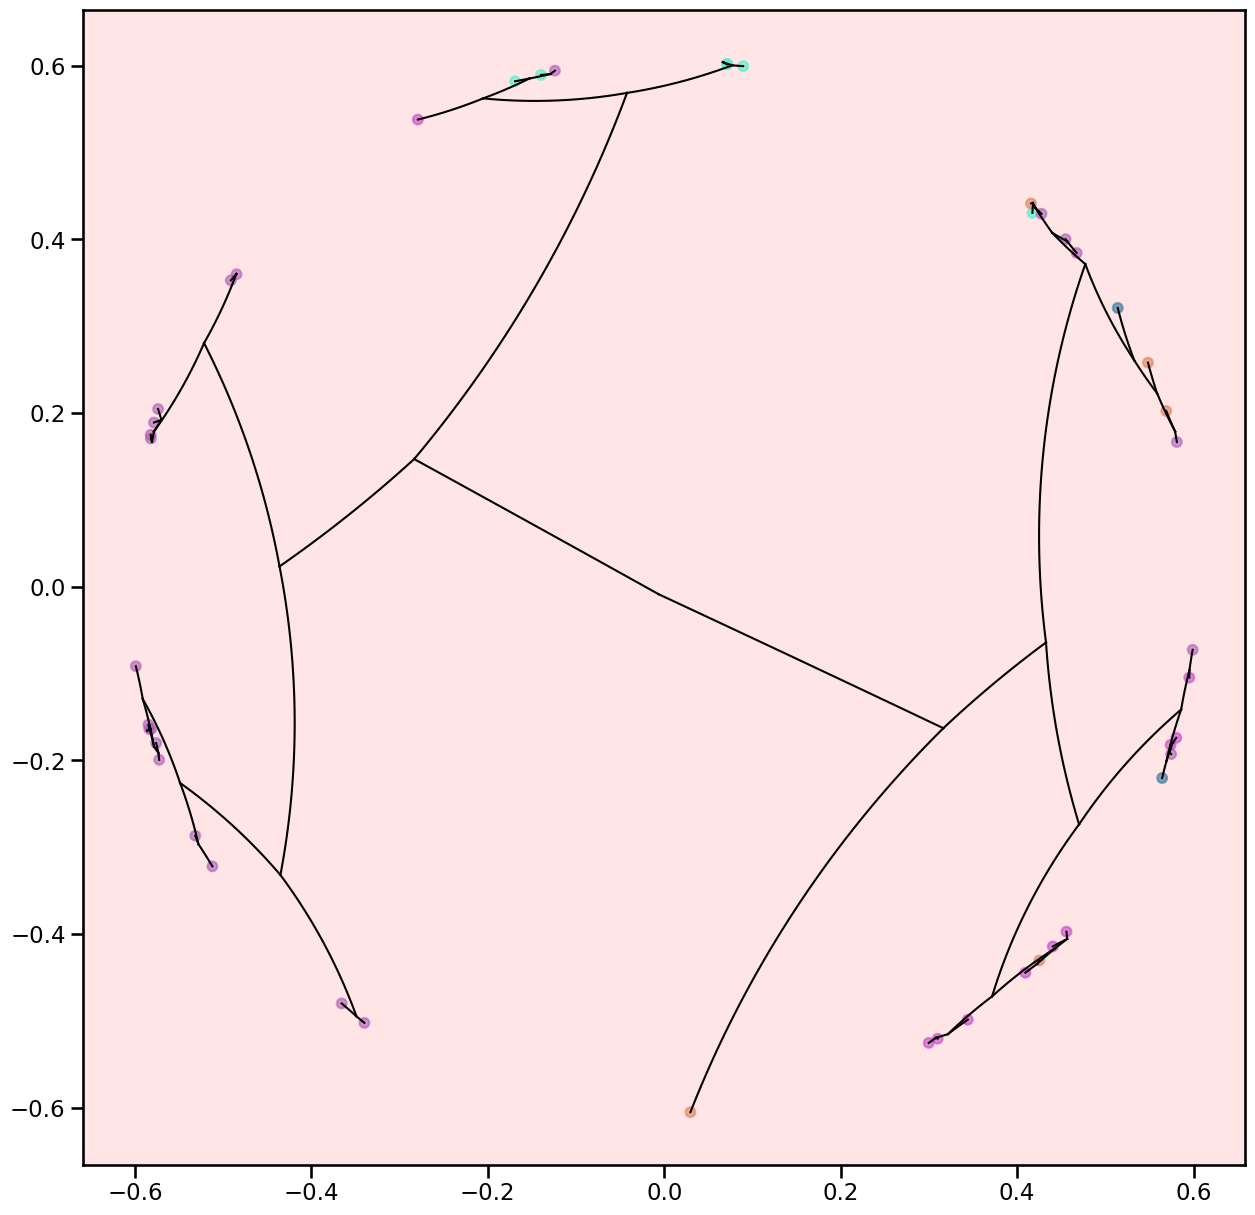

In [196]:
colors = get_colors(meta_list1, 1234)
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
circle = plt.Circle((0, 0), 1.0, color='r', alpha=0.1)
ax.add_artist(circle)
ax.scatter(embeddings[:n, 0], embeddings[:n, 1], c=colors, s=50, alpha=0.6)
# ax.scatter(embeddings[n:,0],embeddings[n:,1],color ='black',s=20,alpha=0.6)
for n1, n2 in tree.edges():
    x1 = embeddings[n1];
    x2 = embeddings[n2]
    plot_geodesic(x1,x2,ax)

In [142]:

nodes1 = [node(name=str(i),son=[]) for i in range(len(uf.tree()))]
for i in range(n):
    nodes1[i].subson=[i];
for i,j in enumerate(uf.tree()):
    if(j!=-1):
        nodes1[j].son.append(nodes1[i])
    nodes1[i].value=torch.tensor(embeddings[i]);
    nodes1[i].hyper=torch.tensor(embeddings[i])
root = nodes1[-1];

In [143]:
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [150]:
hyp_dist(embeddings[3],embeddings[63]),hyp_dist(embeddings[45],embeddings[63]),hyp_dist(embeddings[3],embeddings[45])

(tensor([0.5208], dtype=torch.float64),
 tensor([0.3988], dtype=torch.float64),
 tensor([0.6412], dtype=torch.float64))

In [151]:
hyp_dist(embeddings[10],embeddings[61]),hyp_dist(embeddings[38],embeddings[61]),hyp_dist(embeddings[38],embeddings[10])

(tensor([0.6499], dtype=torch.float64),
 tensor([0.3318], dtype=torch.float64),
 tensor([0.7195], dtype=torch.float64))

In [152]:
hyp_dist(embeddings[43],embeddings[52]),hyp_dist(embeddings[7],embeddings[52]),hyp_dist(embeddings[7],embeddings[43])

(tensor([2.3184], dtype=torch.float64),
 tensor([2.2181], dtype=torch.float64),
 tensor([0.9460], dtype=torch.float64))

In [155]:
hyp_dist(embeddings[5],embeddings[52]),hyp_dist(embeddings[44],embeddings[52]),hyp_dist(embeddings[5],embeddings[44])

(tensor([0.5350], dtype=torch.float64),
 tensor([0.2430], dtype=torch.float64),
 tensor([0.5228], dtype=torch.float64))

In [148]:
temp = rotate(nodes1,embeddings,10,similarities,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
root = nodes1[-1]

	 Epoch 0 | average train loss1: 0.449049
	 Epoch 1 | average train loss1: 0.448331
	 Epoch 2 | average train loss1: 0.448148
	 Epoch 3 | average train loss1: 0.447918
	 Epoch 4 | average train loss1: 0.447326
	 Epoch 5 | average train loss1: 0.447198
	 Epoch 6 | average train loss1: 0.446823
	 Epoch 7 | average train loss1: 0.446856
	 Epoch 8 | average train loss1: 0.446686
	 Epoch 9 | average train loss1: 0.446644


In [149]:

def find_distances(now,distances):
    if(len(now.son)<=1):
        return 
    for son in now.son:
        dis = hyp_dist(son.hyper,now.hyper).numpy()
        distances.append(dis)
        find_distances(son,distances)
ans = []
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 25)
percentile_75 = np.percentile(ans, 50)
percentile_25,percentile_75


(0.47728263408671157, 0.6971012431990955)

In [156]:


temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

49 35
63 45
55 6
47 14
54 19
46 8
56 29
52 44
50 18
48 34
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [159]:
hyp_dist(embeddings[15],embeddings[53]),hyp_dist(embeddings[44],embeddings[53]),hyp_dist(embeddings[15],embeddings[44])

(tensor([0.4843], dtype=torch.float64),
 tensor([0.4364], dtype=torch.float64),
 tensor([0.6466], dtype=torch.float64))

In [160]:
hyp_dist(embeddings[7],embeddings[71]),hyp_dist(embeddings[43],embeddings[71]),hyp_dist(embeddings[7],embeddings[43])

(tensor([0.7905], dtype=torch.float64),
 tensor([0.5550], dtype=torch.float64),
 tensor([0.9460], dtype=torch.float64))

In [161]:
hyp_dist(embeddings[18],embeddings[57]),hyp_dist(embeddings[41],embeddings[57]),hyp_dist(embeddings[18],embeddings[41])

(tensor([0.5441], dtype=torch.float64),
 tensor([0.4579], dtype=torch.float64),
 tensor([0.6971], dtype=torch.float64))

In [162]:
hyp_dist(embeddings[10],embeddings[61]),hyp_dist(embeddings[38],embeddings[61]),hyp_dist(embeddings[38],embeddings[10])

(tensor([0.6499], dtype=torch.float64),
 tensor([0.3318], dtype=torch.float64),
 tensor([0.7195], dtype=torch.float64))

(0.6355445521181227, 0.690476625436224)

In [179]:
ans = []
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 25)
percentile_75 = np.percentile(ans, 35)
percentile_25,percentile_75


temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

62 35
58 14
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [181]:
ans = []
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 25)
percentile_75 = np.percentile(ans, 50)
percentile_25,percentile_75


temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

59 16
57 41
70 40
60 30
61 38
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [31]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 25)
percentile_75 = np.percentile(ans, 75)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

62 4
67 3
58 19
69 20
51 8
53 5
71 43
57 41
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [32]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 25)
percentile_75 = np.percentile(ans, 75)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

73 23
65 29
68 16
70 40
72 24
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [33]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 25)
percentile_75 = np.percentile(ans, 75)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

66 22
64 38
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [36]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 50)
percentile_75 = np.percentile(ans, 100)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

76 27
75 11
74 40
80 38
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [37]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 50)
percentile_75 = np.percentile(ans, 100)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

81 3
78 23
77 11
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [38]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 50)
percentile_75 = np.percentile(ans, 100)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

83 3
79 16
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [41]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 75)
percentile_75 = np.percentile(ans, 100)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

82 19
{'TRGV5/7 gdT': '#184e77', 'TRGV4 gdT': '#1a759f', 'gdT': '#168aad', 'empty': '#fff', 'TRDV2/TRGV9 gdT': '#52b69a', 'TRGV2 gdT': '#99d98c'}


In [39]:
ans=[]
find_distances(root,ans)
ans =np.array(ans)
percentile_25 = np.percentile(ans, 50)
percentile_75 = np.percentile(ans, 100)

percentile_25,percentile_75
temp,root = merge_points(similarities,root,nodes1,embeddings,0,percentile_25,percentile_75,n)
for i in nodes1:
    i.hyper = temp[int(i)]
    i.value =  temp[int(i)]
embeddings = temp.numpy();
add_meta(root,meta_list1,[])
show_tree(root,color=['#184e77','#1a759f','#168aad',"#34a0a4",'#52b69a','#99d98c','#76c893','#99d98c']).show_fig()
remove_meta(root);

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

In [192]:
import sklearn

In [193]:
sklearn.__version__

'1.2.1'

NameError: name 'python' is not defined